Проанализировать данные по выживаемости. Обучить модель предсказания, выживет человек или нет (ключевая переменная). Различные варианты визуализации можно посмотреть здесь: https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python.
Определить наиболее значимые переменные, которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 
Не копировать бездумно чужие работы.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from random import random

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# load data from csv-files
train_file = 'titanic_train.csv'
test_file = 'titanic_test.csv'

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# check colums types
train_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# get columns with nans
print('Training set info:')
print(train_df.isna().sum())
print('\nTest set info:') 
print(test_df.isna().sum())


Training set info:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test set info:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


В данном наборе:<br>
PassengerId - id пассажиров<br>
Survived - выжили ли пассажиры<br>
Pclass - класс билета<br>
Name - имена пассажиров<br>
Sex - пол пассажиров<br>
Age - возраст<br>
SibSp - кол-во братьев, сестер, супруг на борту<br>
Parch - кол-во детей, родителей на борту<br>
Ticket - билет<br>
Fare - плата за проезд<br>
Cabin - кабина<br>
Embarked - порт отправления

В тренировочном наборе данных 891 строка, а в колонках 'Age' и 'Cabin' 177 и 687 пропусков соответственно. Много, чтобы удалить, поэтому заполним пропуски в колонке 'Age' средним значением возраста.<br>
В колонке 'Cabin' находятся номера кабин. Так как это текстовая колонка с большим кол-вом разнообразных значений, не будем заполнять пропуски, а проигнорируем колонку.<br>
В колонке 'Embarked' 2 пропуска, поэтому исключим строки с ними.<br><br>
В тестовом наборе данных 418 строк, а в колонках 'Age' и 'Cabin' 86 и 327 пропусков соответственно. Много, чтобы удалить, поэтому проделаем предобработку, аналогичную предобработке тренировочного набора данных.<br>
В колонке 'Fare' 1 пропуск, поэтому исключим строку с ним.

In [6]:
# fill Age nans with average age
train_df.Age = train_df.Age.fillna(train_df.Age.mean())
test_df.Age = test_df.Age.fillna(test_df.Age.mean())

# drop nans in Embarked column
train_df = train_df.dropna(subset=['Embarked'])

# drop nan in Fare column
test_df = test_df.dropna(subset=['Fare'])

print('Train n_samples =', len(train_df), '\nTest n_samples =', len(test_df))


Train n_samples = 889 
Test n_samples = 417


Для данной задачи используем информацию колонок 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'. Кодируем текстовые колонки.

In [7]:
# get target column name
target = list(set(train_df.columns).difference(test_df.columns))
target


['Survived']

In [8]:
# encode text colums
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_df = train_df[features_columns + target]  
test_df = test_df[features_columns]

text_cols = [key for key, val in train_df.dtypes.to_dict().items() if val == object]

for text_col in text_cols:
    print(text_col)

    unique_vals = train_df[text_col].unique()
    encoder_dict = dict(zip(unique_vals, range(len(unique_vals))))
    print('\t', encoder_dict)

    train_df[text_col] = train_df[text_col].apply(lambda x: encoder_dict[x])
    test_df[text_col] = test_df[text_col].apply(lambda x: encoder_dict[x])


Sex
	 {'male': 0, 'female': 1}
Embarked
	 {'S': 0, 'C': 1, 'Q': 2}


In [9]:
# get columns with nans
print('Training set types:')
print(train_df.dtypes)
print('\nTest set types:') 
print(test_df.dtypes)


Training set types:
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

Test set types:
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


In [10]:
# find DecisionTreeClassifier's best params
params_grid = {'splitter': ('best', 'random'), 'max_depth': range(2, 6),
               'min_samples_split': range(2, 5), 'min_samples_leaf': range(1, 3), 
               'max_features': ('sqrt', 'log2', None), 'class_weight': ('balanced', None)}

search_cv = GridSearchCV(DecisionTreeClassifier(), params_grid, n_jobs=-1)
search_cv = search_cv.fit(train_df[test_df.columns], train_df[target])
res_df = pd.DataFrame(search_cv.cv_results_)


In [11]:
interested_columns = [col for col in res_df.columns if 'mean_' in col or 'param_' in col]
res_df = res_df[interested_columns].sort_values(by=['mean_test_score'], ascending=False)
res_df


,mean_fit_time,mean_score_time,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,mean_test_score
285,0.011994,0.014216,None,5,None,2,3,random,0.823430
247,0.014287,0.015849,None,4,None,2,2,random,0.822288
277,0.009558,0.011612,None,5,None,1,2,random,0.816695
286,0.012787,0.011768,None,5,None,2,4,best,0.813318
282,0.014654,0.015252,None,5,None,2,2,best,0.813318
...,...,...,...,...,...,...,...,...,...
54,0.020710,0.017189,balanced,3,log2,2,2,best,0.656942
17,0.036565,0.029234,balanced,2,log2,1,4,random,0.655532
153,0.014083,0.016702,None,2,sqrt,2,3,random,0.651374
159,0.017446,0.027710,None,2,log2,1,3,random,0.640037


In [12]:
dec_tree = search_cv.best_estimator_
search_cv.best_params_


{'class_weight': None,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

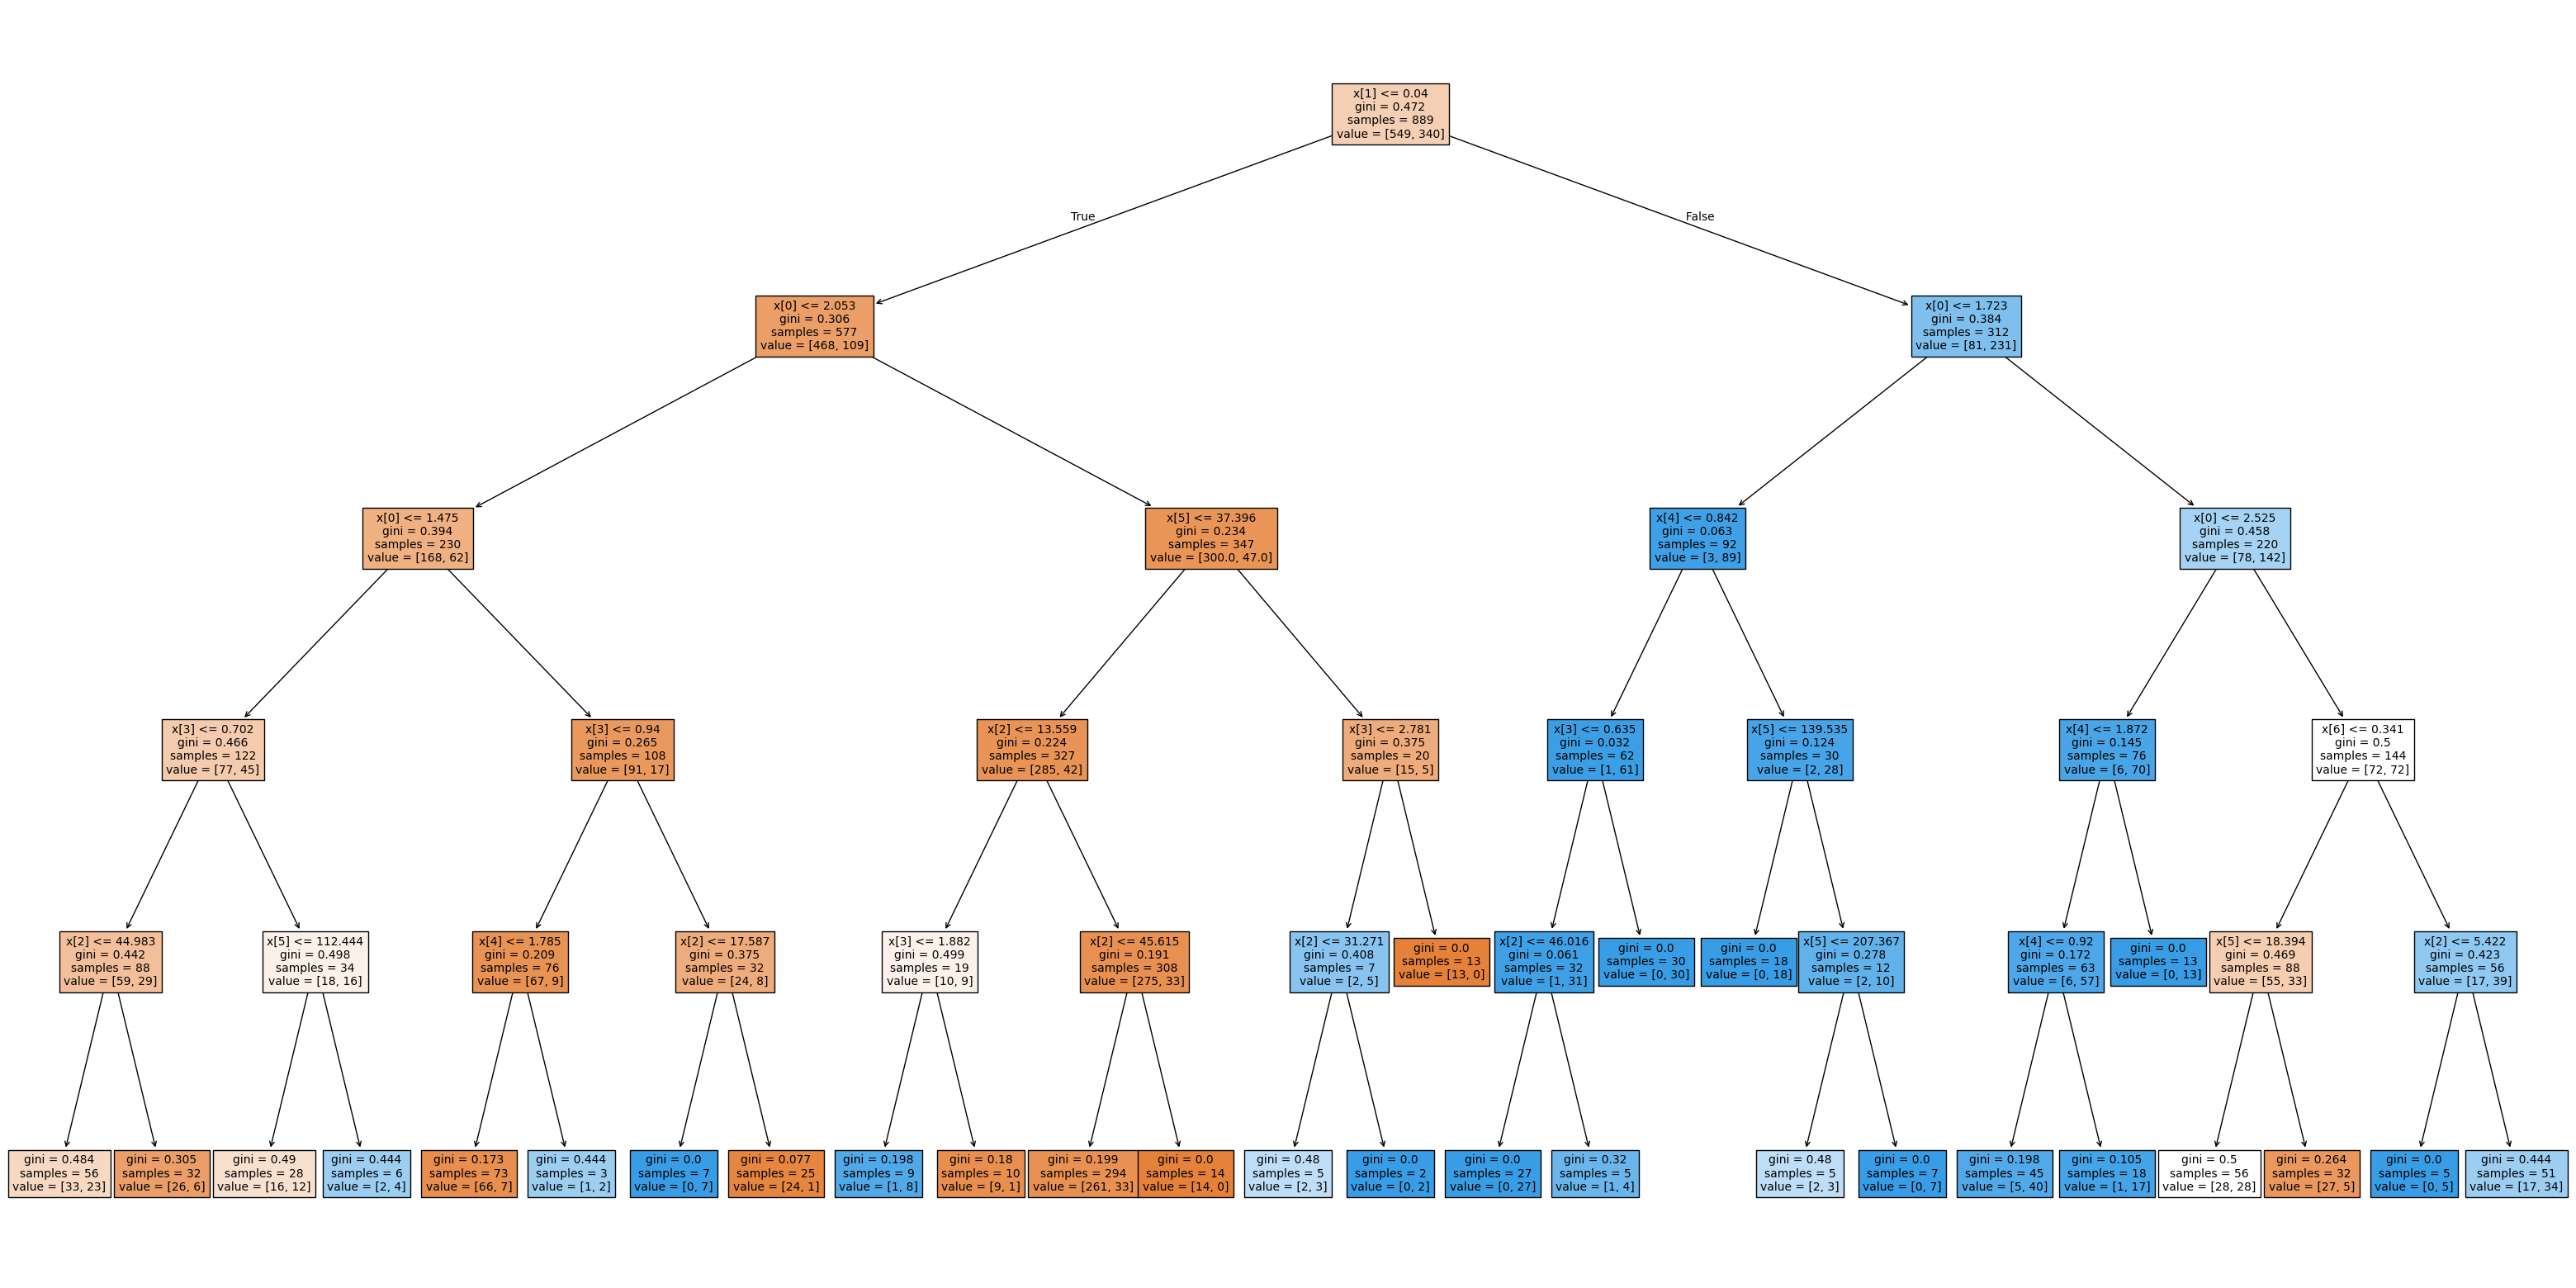

In [13]:
# visualize tree
plt.subplots(figsize=(40, 20))
_ = tree.plot_tree(dec_tree, filled=True, fontsize=10)


In [14]:
# get predicted results
pred_y = dec_tree.predict(test_df)


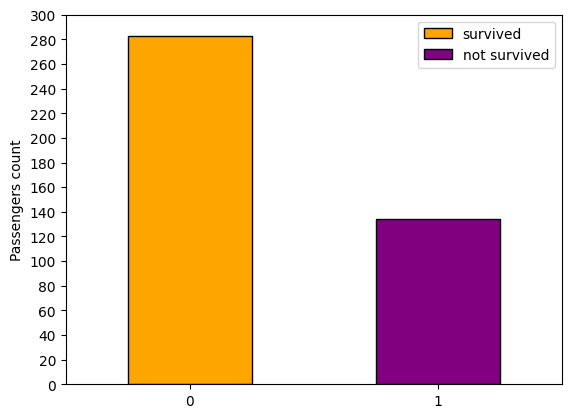

In [16]:
# visualize predicted results
counts = (sum(pred_y == 0), sum(pred_y == 1))
plt.bar(x=(0), height=counts[0], width=0.5, edgecolor='k', color=('orange'), label='survived')
plt.bar(x=(1), height=counts[1], width=0.5, edgecolor='k', color=('purple'), label='not survived')

plt.legend()
plt.ylim(0, 300)
plt.xlim(-0.5, 1.5)
plt.ylabel('Passengers count')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(20))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))


Ответить на вопросы (обоснованно):
1. Как влияет размер семьи на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет?).
2. Как влияет пол/возраст/номер палубы? 

Ниже представлены параметры в порядке убывания своего влияния на значение целевой переменной. Наиболее значимыми являются столбцы 'Sex' и 'Pclass'.

In [17]:
# get features importances
inportance_df = pd.DataFrame(dec_tree.feature_importances_, index=dec_tree.feature_names_in_, columns=['Importance'])
inportance_df.sort_values(by='Importance', ascending=False, inplace=True)
inportance_df


,Importance
Sex,0.580092
Pclass,0.193960
Age,0.089771
SibSp,0.058043
Fare,0.034206
Embarked,0.033304
Parch,0.010623


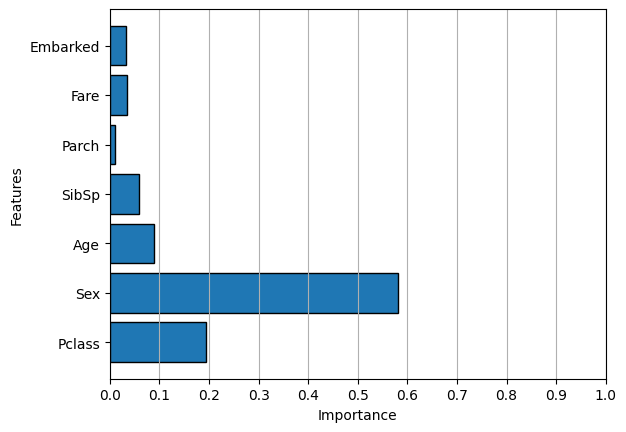

In [18]:
# visualize features importances
plt.barh(y=dec_tree.feature_names_in_, width=dec_tree.feature_importances_, edgecolor='k')

plt.xlim(0., 1.)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.grid(axis='x')


In [19]:
res_test_df = pd.concat([test_df, pd.DataFrame(pred_y, columns=target, index=test_df.index)], axis=1)


In [20]:
# visualize dependeency between interested_col and survive probabilty
def visualize_deps(interested_col: str, step_x=1):
    global res_test_df

    counts_not_surv = res_test_df[res_test_df[target[0]] == 0][interested_col].value_counts()
    counts_surv = res_test_df[res_test_df[target[0]] == 1][interested_col].value_counts()

    width = 0.4
    step_y = 20

    plt.bar(x=counts_not_surv.index - width / 2, height=counts_not_surv, width=width, edgecolor='k', color=(random(), random(), random(), random()), label='not survived')
    plt.bar(x=counts_surv.index + width / 2, height=counts_surv, width=width, edgecolor='k', color=(random(), random(), random(), random()), label='survived')

    plt.ylim(0, (max(counts_not_surv) // step_y + 1) * step_y)
    if step_x != 1:
        plt.xlim(0, (max(res_test_df[interested_col]) // step_x + 1) * step_x)

    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(step_y))
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step_x))
    plt.xlabel(interested_col)
    plt.ylabel('Count')
    plt.legend()
    

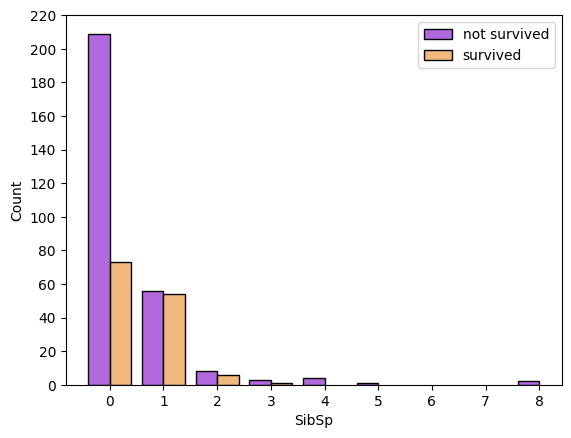

In [21]:
# visualize dependency between SibSp count and survived status
interested_col = 'SibSp'
visualize_deps(interested_col)


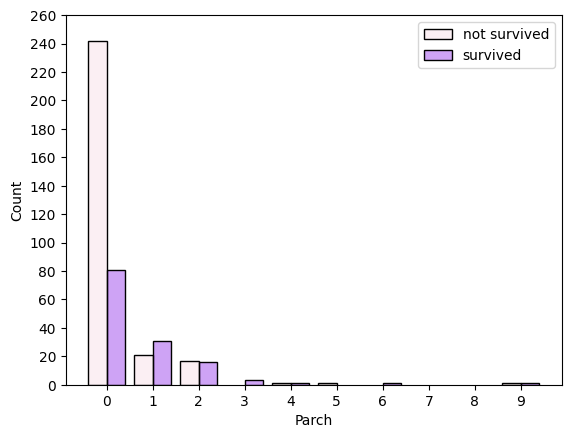

In [22]:
# visualize dependency between Parch count and survived status
interested_col = 'Parch'
visualize_deps(interested_col)


Как видно из гистограмм выше, одинокие пассажиры выживают реже, пассажиры с родственниками до 3-4ех человек выживают чаще.

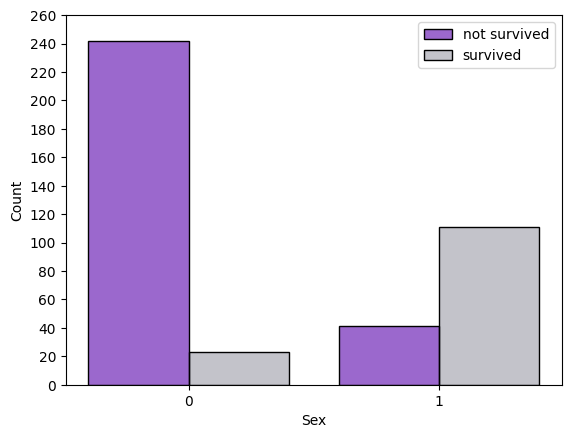

In [23]:
# visualize dependency between sex and survived status
interested_col = 'Sex'
visualize_deps(interested_col)


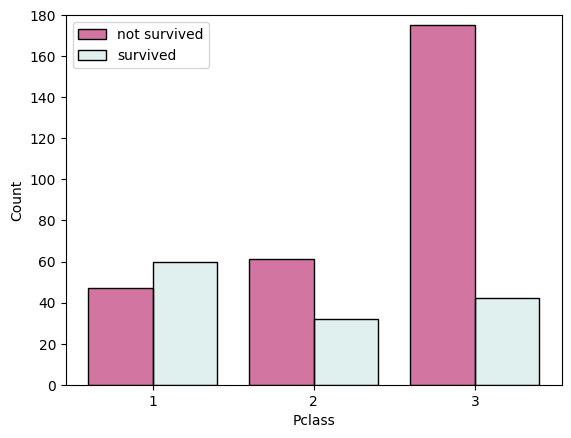

In [24]:
# visualize dependency between Pclass count and survived status
interested_col = 'Pclass'
visualize_deps(interested_col)


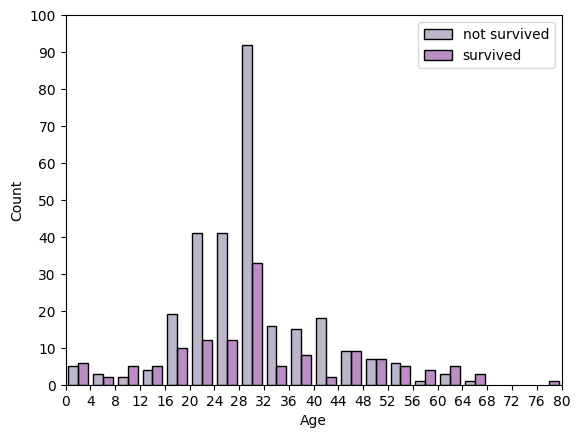

In [25]:
# visualize dependency between age, grouped by step_x years, and survived status
step_x = 4
interested_col = 'Age'

counts_not_surv = dict()
counts_surv = dict()
max_border = (max(res_test_df[interested_col]) // step_x + 1) * step_x

for age in range(0, int(max_border), step_x):
    counts = res_test_df[(res_test_df[interested_col] >= age) & (res_test_df[interested_col] < age + step_x)][target].value_counts()

    if 0 in counts.index:
        counts_not_surv.update({age + step_x / 2: counts[0]})
    if 1 in counts.index:
        counts_surv.update({age + step_x / 2: counts[1]})

width = 1.6
step_y = 10

plt.bar(x=np.fromiter(counts_not_surv.keys(), dtype=float) - width / 2, height=counts_not_surv.values(), width=width, edgecolor='k', color=(random(), random(), random(), random()), label='not survived')
plt.bar(x=np.fromiter(counts_surv.keys(), dtype=float) + width / 2, height=counts_surv.values(), width=width, edgecolor='k', color=(random(), random(), random(), random()), label='survived')

plt.ylim(0, (max(counts_not_surv.values()) // step_y + 1) * step_y)
plt.xlim(0, max_border)
plt.xlabel(interested_col)
plt.ylabel('Count')
plt.legend()
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(step_y))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step_x))


По последним гистограммам видно, что выживают преимущетсвенно женщины.<br>
Пассажиры, находящиеся на палубе 1, выживут вероятнее, чем на других палубах.<br>
А также, у пассажиров в возрастах до 20 лет и после 44 лет, шансы на выживание выше, чем у остальных.